**3. Preliminary exploratory data analysis:**
Demonstrate that the dataset can be read from the web into R.

Clean and wrangle your data into a tidy format.

Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.

Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [78]:
# Loading the libraries
library(dplyr)
library(tidyverse)
library(readr)
library(tidymodels)
library(recipes)
library(RColorBrewer)

In [79]:
#Loading data into R, selecting interested columns and previewing first 6 rows
heart <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                 col_names = c("age", "sex", "chestpaintype", "restbps", 
                               "cholesterolserum", "fastingbs", "restecg",
                               "maxheartrate", "exerciseangina", "oldpeak",
                               "slope", "nmajorvessels", "thalassemia", 
                               "diagnosis"))                                %>%
        mutate(diagnosis = as_factor(diagnosis)) %>%
select(age, sex, restbps, cholesterolserum, fastingbs, maxheartrate, diagnosis)

head(heart)

#Looking at how many missing values are in each variable:
colSums(is.na(heart))

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chestpaintype = col_double(),
  restbps = col_double(),
  cholesterolserum = col_double(),
  fastingbs = col_double(),
  restecg = col_double(),
  maxheartrate = col_double(),
  exerciseangina = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  nmajorvessels = col_character(),
  thalassemia = col_character(),
  diagnosis = col_double()
)



age,sex,restbps,cholesterolserum,fastingbs,maxheartrate,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,1,150,0
67,1,160,286,0,108,2
67,1,120,229,0,129,1
37,1,130,250,0,187,0
41,0,130,204,0,172,0
56,1,120,236,0,178,0


age              sex          restbps cholesterolserum 
               0                0                0                0 
       fastingbs     maxheartrate        diagnosis 
               0                0                0

In [42]:
# Since values other than 0 for diagnosis means presence of heart disease, 1-4 values are lumped into 1.
#Sex and diagnosis factors are also recoded to ease understanding of their values and converted into factors for graphing.
heart_disease <- mutate(heart, diagnosis = fct_lump(diagnosis, other_level = "1")) %>%
  mutate(sex = recode_factor(sex, `1` = "male", `0` = "female" ),
         diagnosis = recode_factor(diagnosis, `1`= "yes",`0` = "no"),
        fastingbs = recode_factor(fastingbs, `1`= "over120", `0` = "under120"))
head(heart_disease)

age,sex,restbps,cholesterolserum,fastingbs,maxheartrate,diagnosis
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
63,male,145,233,over120,150,no
67,male,160,286,under120,108,yes
67,male,120,229,under120,129,yes
37,male,130,250,under120,187,no
41,female,130,204,under120,172,no
56,male,120,236,under120,178,no


In [80]:
#Looking at the means of each predictor
heart_means <- heart_disease %>%
select(age, restbps, cholesterolserum, maxheartrate) %>%
map_df(mean)
heart_means

age,restbps,cholesterolserum,maxheartrate
<dbl>,<dbl>,<dbl>,<dbl>
54.43894,131.6898,246.6931,149.6073


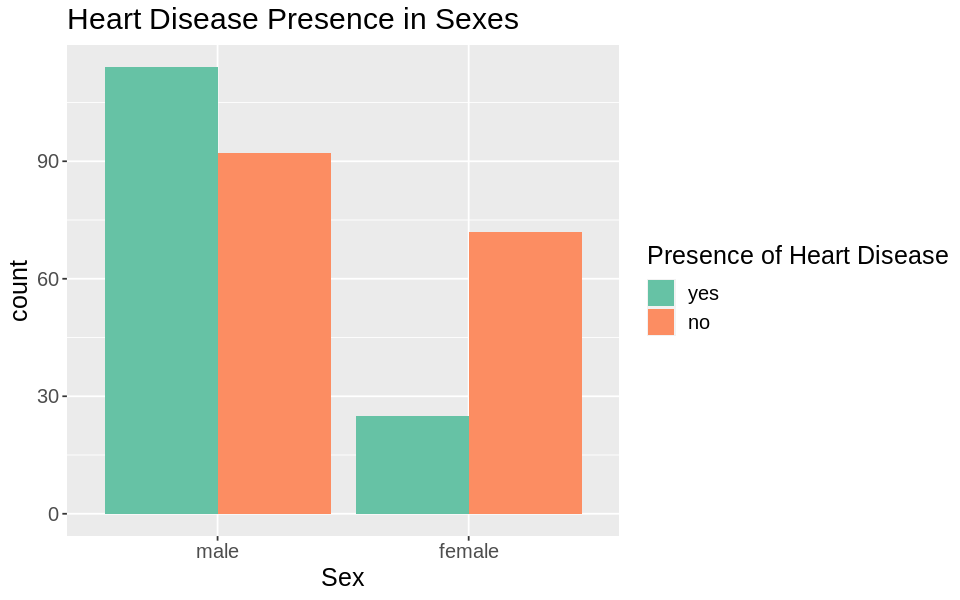

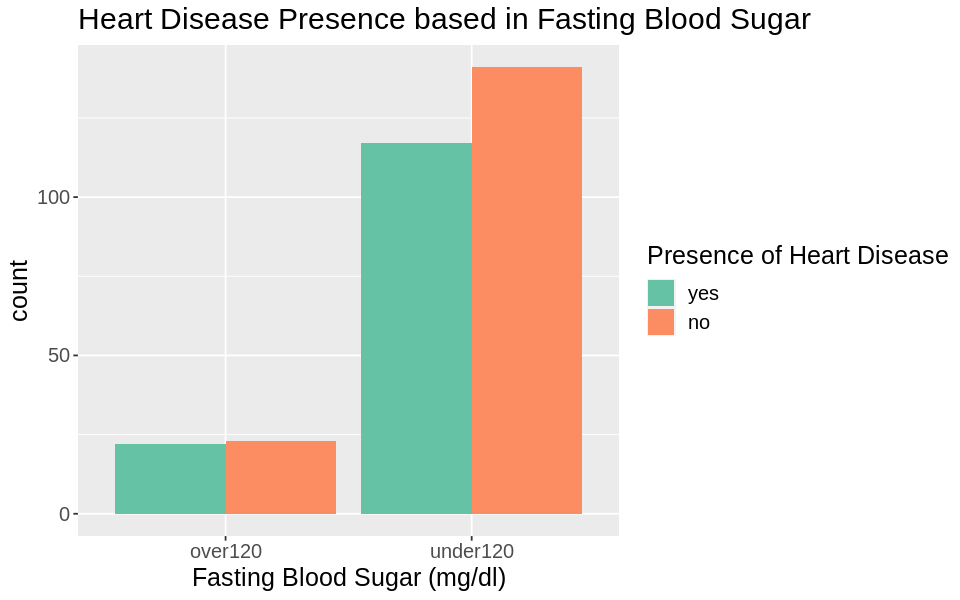

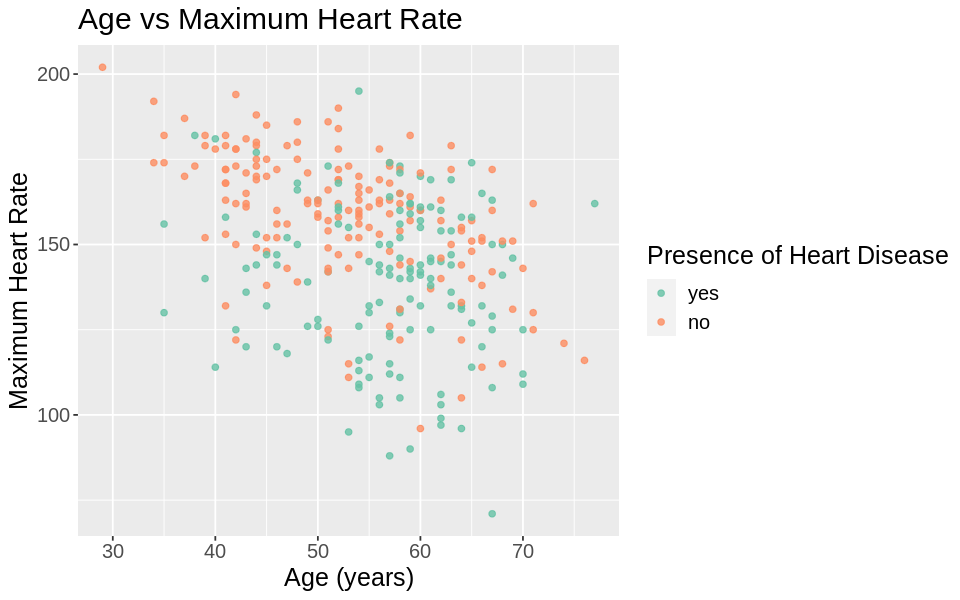

In [76]:
#Visualizing different relevant plots.
options(repr.plot.width = 8, repr.plot.height = 5) 
sex_plot <- ggplot(heart_disease, aes(x = sex, fill = diagnosis)) +
geom_bar(position = "dodge") +
labs(x = "Sex", fill = "Presence of Heart Disease") +
ggtitle("Heart Disease Presence in Sexes")+
theme(text = element_text(size = 15)) +
scale_fill_brewer(palette = "Set2")
sex_plot

bs_plot <- ggplot(heart_disease, aes(x = fastingbs, fill = diagnosis)) +
geom_bar(position = "dodge") +
labs(x = "Fasting Blood Sugar (mg/dl)", fill = "Presence of Heart Disease") +
ggtitle("Heart Disease Presence based in Fasting Blood Sugar")+
theme(text = element_text(size = 15)) +
scale_fill_brewer(palette = "Set2")
bs_plot

agevsheartrate <- ggplot(heart_disease, aes(x = age, y = maxheartrate, color = diagnosis)) +
geom_point(alpha = 0.8) +
labs(x = "Age (years)", y = "Maximum Heart Rate", color = "Presence of Heart Disease") +
ggtitle("Age vs Maximum Heart Rate") +
theme(text = element_text(size = 15)) +
scale_color_brewer(palette = "Set2")
agevsheartrate